# Iris 분류 머신러닝 실습

## 환경 설정
```bash
conda activate 가상환경명
conda install numpy scipy scikit-learn matplotlib ipython pandas imageio pillow graphviz python-graphviz
```

## 머신러닝 프로세스

### 1. 데이터준비 (전처리는 나중에는 본인이 직접 해야 한다.) - 80%
- 데이터수집, 결측치처리, 이상치처리, 중복성배제, 정규화, 주성분분석이나 차원축소등..... (중요특성선택하기)
- 카테고리화(문자열형태) 원핫인코딩등

### 2. 데이터셋을 두개로 나눈다. 훈련셋과 테스트셋으로 나눈다.
- 전부 다 학습을 하면 과대적합인지 과소적합인지 미래 예측력이 있는지 알 수 가 없어서
- 5:5 6:4 7:3 8:2 정도로 나누어서 테스트가 가능하도록, 훈련셋에만 맞춰지면 안된다.
- 일반화를 위해서 쪼개야 한다

### 3. 알고리즘 선택
- 분류알고리즘 (로지스틱회귀분석(데이터가 많아지면 하이퍼파라미터 추가됨), 서포트벡터머신, 의사결정트리, 랜덤포레스트, 그라디언트부스팅...)
- 각 알고리즘마다 성능(학습을 좀더 잘하게)을 올릴수 있는 하이퍼파라미터가 있는데 이걸 찾아내는 과정이 필요하다.

### 4. 예측을 한다.

### 5. 성능평가를 한다.
- model에 있는 score 함수가 일반적으로 많이 쓰이는데 정밀하게 파악하는 수단도 있다


In [2]:
# 1. 데이터 로드 및 탐색
from sklearn.datasets import load_iris

data = load_iris()  # Bunch 라는 클래스 타입 
print("데이터 키:", list(data.keys()))
print("타겟이름:", data.target_names)
print("파일명:", data.filename)


데이터 키: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
타겟이름: ['setosa' 'versicolor' 'virginica']
파일명: iris.csv


In [3]:
print("\n데이터설명:")
print(data.DESCR)


데이터설명:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 clas

In [4]:
# 2. 데이터를 나누기 
X = data.data   # ndarray 2차원배열
y = data.target # ndarray 1차원배열 

print("X 데이터 처음 10개:")
print(X[:10])
print("\ny 데이터:")
print(y)

X 데이터 처음 10개:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

y 데이터:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# 3. 훈련 및 테스트 세트 분리
from sklearn.model_selection import train_test_split 

# 데이터를 랜덤하게 섞어서 70%추출, train_test_split: 데이터를 랜덤하게 섞어서 나눠준다
# tuple로 반환, random_state인자가 시드역할, 계속 같은 데이터 내보내고 싶으면 이 값을 고정해야 한다
# test_size=0.3 그 비율대로 나뉜다 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.3)
print("훈련셋 크기:", X_train.shape)
print("테스트셋 크기:", X_test.shape)


훈련셋 크기: (105, 4)
테스트셋 크기: (45, 4)


## 데이터 시각화

산점행렬(scatter matrix)를 통해 데이터 전체를 확인할 수 있습니다.
- 특성이 4개면 각 특성대 특성으로만 그릴 수 있어서 차트 4X4=16개
- 특성이 10개가 되면 10 X 10 = 100개 차트가 만들어집니다
- scatter_matrix 차트는 직접 노가다로 그릴수도 있고 DataFrame이 제공해줍니다
- 아니면 Seaborn 차트를 사용할 수도 있습니다
- numpy 배열을 DataFrame으로 바꿔서 사용합니다


In [6]:
# 시각화 코드 (주석 처리됨)
import pandas as pd 
# iris_df = pd.DataFrame(X, columns=data.feature_names) #numpy배열과 컬러명으로 
# import matplotlib.pyplot as plt #모든 차트는 matplotlib.pyplot가 필요하다 

# pd.plotting.scatter_matrix( iris_df, 
#                     c=y, #각 점의 색상을 지정한다. 0,1,2 각자 다른색 지정
#                     figsize=(15,15),  #차트크기 단위는 inch임 
#                     marker='o', 
#                     hist_kwds={'bins':20}, #대각선의 히스토그램의 구간 개수 
#                     s=60, #점의 크기 
#                     alpha=0.8  #투명도 1이 불투명, 0으로 갈수록 투명하다 
# )
# plt.show()


## KNN 이웃 알고리즘

**KNN 이웃알고리즘**은 내 옆집에 누가 사느냐를 확인하는 것과 같습니다.
- 거리로 가장 가까운 거리에 누가 있느냐를 확인
- 거리를 재는 방식이 유클리드 기하학을 사용
- 이웃을 몇개까지 볼거냐를 선택할 수 있음
- 이웃의 개수를 지정할 수 있음 (대부분의 홀수개를 지정하는 경우가 많음)
- 회귀 분류 둘다 가능


In [7]:
# 4. KNN 알고리즘
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)  # 이웃의 개수 2개 

# 학습을 시작한다. 학습한 내용은 모델 자체가 갖고 있고 충분히 모델의 하이퍼파라미터가 지정되어서 
# 최대한의 학습효과를 얻었다고 생각하면 모델을 저장해놓고 나중에 불러와서 다시 쓸 수 있다.
model.fit(X_train, y_train) 

# 예측하기 
y_pred = model.predict(X_test)  # 테스트셋으로 예측한 데이터를 반환한다. 
# 본래의 테스트셋인 y_test와 비교해본다 
print("예측 결과:", y_pred)
print("실제 결과:", y_test)

# 평가하기 
print("\nKNN 성능 평가:")
print("훈련셋 평가:", model.score(X_train, y_train))
print("테스트셋 평가:", model.score(X_test, y_test))


예측 결과: [1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0 1 2 0 1 1 0 0
 0 0 1 0 1 0 2 2]
실제 결과: [1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0 1 2 0 2 1 0 0
 0 0 1 0 1 0 2 2]

KNN 성능 평가:
훈련셋 평가: 0.9714285714285714
테스트셋 평가: 0.9777777777777777


In [8]:
# 클래스 이름으로 출력
# class_names = list(data.target_names)
# for i, j in zip(y_pred, y_test):
#     print("예측 :{:20s} 실제:{:20s}".format(class_names[i], class_names[j]))


In [9]:
# 5. 로지스틱 회귀 분류
# 로지스틱 분류: 2진, 다중분류, R은 2진분류만 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train) 

print("로지스틱 회귀 결과:")
print("훈련셋 평가:", model.score(X_train, y_train))
print("테스트셋 평가:", model.score(X_test, y_test))
print("계수(coefficients):", model.coef_)
print("절편(intercept):", model.intercept_)


로지스틱 회귀 결과:
훈련셋 평가: 0.9714285714285714
테스트셋 평가: 0.9777777777777777
계수(coefficients): [[-0.40787668  0.79760635 -2.29819827 -0.90058518]
 [ 0.48587928 -0.24402868 -0.1380638  -0.92582683]
 [-0.07800259 -0.55357767  2.43626207  1.82641201]]
절편(intercept): [  9.34844704   1.68961439 -11.03806143]


## 의사결정트리 (Decision Tree)

**의사결정트리**는 회귀와 분류 모두 가능합니다.
- 필연적으로 과대적합이 됩니다. 알고리즘 자체가 과대적합으로 갑니다
- 의사결정트리 알고리즘은 **특성의 중요도 파악용**으로 주로 사용됩니다
- 트리 시작이 랜덤이라서, 시드를 잡아주지 않으면 만들어질때마다 다르게 나옵니다


In [10]:
# 6. 의사결정트리 (회귀와 분류 모두 가능하다)
from sklearn.tree import DecisionTreeClassifier

# 트리시작이 랜덤이라서, 시드를 잡아주지 않으면 만들어질때마다 다르게 나온다 
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

print("의사결정트리 결과:")
print("훈련셋 평가:", model.score(X_train, y_train))
print("테스트셋 평가:", model.score(X_test, y_test))
print("특성의 중요도:", model.feature_importances_)  # 특성의 중요도


의사결정트리 결과:
훈련셋 평가: 1.0
테스트셋 평가: 0.9777777777777777
특성의 중요도: [0.00715649 0.01908397 0.06579426 0.90796529]


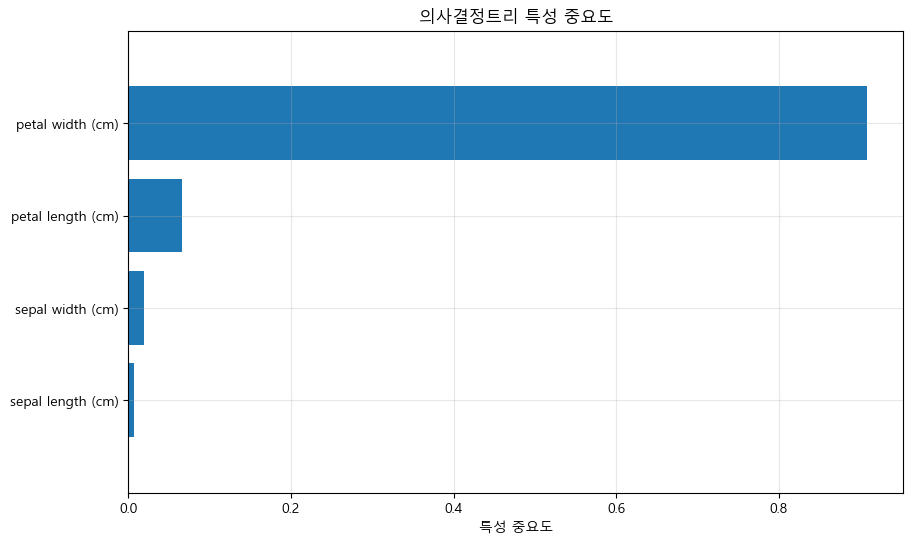

In [11]:
# 7. 특성 중요도 시각화
import matplotlib.pyplot as plt
import numpy as np  

# 한글 폰트 설정 (한글 깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def treeChart(model, feature_name):
    """수평막대 차트를 그려보자: 중요도를 그려보자"""
    # 수평막대개수 구하기: 특성의 개수만큼 구하면 된다. 
    n_features = len(model.feature_importances_)
    # barh - 수평막대그래프 
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), feature_name)  # y축 단위 
    plt.ylim(-1, n_features)  # 눈금 범위 
    plt.xlabel('특성 중요도')
    plt.title('의사결정트리 특성 중요도')
    plt.grid(True, alpha=0.3)
    plt.show() 

treeChart(model, data.feature_names)


## 랜덤포레스트 (Random Forest)

**랜덤포레스트**는 의사결정트리를 랜덤하게 많이 만들어서 평균값 따져서 예측하는 앙상블의 일종입니다.
- 과대적합의 위험을 갖고 있습니다
- **하이퍼파라미터**:
  - `random_state`: 꼭 지정해줘야 합니다
  - `max_depth`: 트리의 깊이를 제한합니다
  - `n_estimators`: 결정트리를 몇개까지 만들까 (너무 크면 시간이 많이 걸리고, 너무 작으면 과대적합문제가 발생)
- 모델을 생성할때 전달되는 파라미터를 하이퍼파라미터라고 하고 이 값들을 적절히 활용해서 과대적합도 과소적합도 막아서 일반화를 해야 합니다.


In [12]:
# 8. 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# random_state 꼭 지정해줘야 한다  
# max_depth: 트리의 깊이를 막자 
# n_estimators: 결정트리를 몇개까지 만들까 너무 크면 시간이 많이 걸린다. 
# 너무 작으면 과대적합문제가 발생한다. 일반화 
model = RandomForestClassifier(
    random_state=0, 
    max_depth=3, 
    n_estimators=1000
)
model.fit(X_train, y_train)

print("랜덤포레스트 결과:")
print("훈련셋 평가:", model.score(X_train, y_train))
print("테스트셋 평가:", model.score(X_test, y_test))
print("특성의 중요도:", model.feature_importances_)


랜덤포레스트 결과:
훈련셋 평가: 0.9809523809523809
테스트셋 평가: 0.9777777777777777
특성의 중요도: [0.0965599  0.01497849 0.45500445 0.43345716]


In [13]:
# 9. 모든 알고리즘 성능 비교
print("=" * 50)
print("모든 알고리즘 성능 비교 요약")
print("=" * 50)

algorithms = ["KNN", "로지스틱 회귀", "의사결정트리", "랜덤포레스트"]
# 각 알고리즘별로 다시 학습하여 점수 비교

# KNN
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)
knn_score = knn_model.score(X_test, y_test)

# 로지스틱 회귀
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)

# 의사결정트리
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)
dt_score = dt_model.score(X_test, y_test)

# 랜덤포레스트
rf_model = RandomForestClassifier(random_state=0, max_depth=3, n_estimators=1000)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)

scores = [knn_score, lr_score, dt_score, rf_score]

for alg, score in zip(algorithms, scores):
    print(f"{alg:15s}: {score:.4f}")
    
print("=" * 50)


모든 알고리즘 성능 비교 요약
KNN            : 0.9778
로지스틱 회귀        : 0.9778
의사결정트리         : 0.9778
랜덤포레스트         : 0.9778
